In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Deep Neural Networks

## Working with Tensorflow 
- One hidden layer
- Fashion MNIST

In [2]:
# Lets import some libraries
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler

import tensorflow as tf

%matplotlib inline

In [3]:
# Some basic parameters

inpDir = './' # location where input data is stored
outDir = './' # location to store outputs
modelDir = './'
subDir = './'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
tf.random.set_seed(RANDOM_STATE) # setting for Tensorflow as well


EPOCHS = 10 # number of epochs
ALPHA = 0.01 # learning rate

#BATCH_SIZE = 256 
NUM_SAMPLE = 1280
NOISE = 0.2
TEST_SIZE = 0.2

# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (15,15),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

CMAP = plt.cm.brg

plt.rcParams.update(params) # update rcParams

### Settings so that Tensorflow can not Hog all the GPU memory

In [4]:
physical_devices = tf.config.list_physical_devices('GPU') 

if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Load Fashion MNIST

In [5]:
train_df = pd.read_csv(os.path.join(inpDir, 
                                    subDir, 
                                    'fashion-mnist_train.csv'), header=0)

test_df = pd.read_csv(os.path.join(inpDir, 
                                    subDir, 
                                    'fashion-mnist_test.csv'), header=0)

In [6]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [8]:
#  Split the data in training and test sets to measure performance of the model.
X_train = train_df.drop('label', axis = 1).to_numpy()
X_test = test_df.drop('label', axis = 1).to_numpy()
y_train = train_df['label'].to_numpy()
y_test = test_df['label'].to_numpy()

In [9]:
X_train = X_train/255.

X_test = X_test/255.

In [10]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Prepare model

Build the `tf.keras.Sequential` model by stacking layers from `tf.keras.layers.Dense`. Activations can be given as string or from `tf.keras.activations.tanh` 

In [11]:
784//16

49

In [12]:
# Define Model Calling class Sequential and pass all layers as a list

model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(196, activation='tanh'), # Alter : tf.keras.activations.tanh
    
    tf.keras.layers.Dense(49, activation='tanh'), # Alter : tf.keras.activations.tanh
    
    tf.keras.layers.Dense(10)
])

## Reference
<p style="font-family: Arial; font-size:1.2em;color:black;">
Details of <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/Sequential">Sequential Model</a>. Sequential provides training and predict features on this model.
</p>

### Functional API

<p style="font-family: Arial; font-size:1.2em;color:black;">You can also instantiate a Model with the <strong>"Functional API"</strong>, where you start from Input, you chain layer calls to specify the model's forward pass, and finally you create your model from inputs and outputs:

>import tensorflow as tf

>inputs = tf.keras.Input(shape=(2,))
    
>x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)

>outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

>model = tf.keras.Model(inputs=inputs, outputs=outputs)

    
<p style="font-family: Arial; font-size:1.2em;color:black;">You can also extend the model class, if love to live by sword!!
</p>

<p style="font-family: Arial; font-size:1.2em;color:black;">
    For each example the model returns a vector of "logits" or "log-odds" scores, one for each class.
</p>

<p style="font-family: Arial; font-size:1.2em;color:black;">
    <b>Unit Test</b>: Predict using untrained model.
</p>

In [13]:
y_pred = model(X_train[:1])
y_pred

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-0.05408686, -0.08413462,  0.00406086, -0.4408112 ,  0.17975137,
        -0.411882  ,  0.1268736 ,  0.6122826 ,  0.05467037, -0.5165002 ]],
      dtype=float32)>

In [14]:
tf.nn.softmax(y_pred)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.09467562, 0.09187314, 0.10034399, 0.06431109, 0.11961696,
        0.06619873, 0.1134562 , 0.1843481 , 0.10555305, 0.0596231 ]],
      dtype=float32)>

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [15]:
'''
Number of parameters:
    layer 1 : 2*4 +4 = 12 
    layer 2 : 4*4 + 2 = 10
We are not locking any layer hence all parameter are trainable    
'''

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 196)                  153860    
                                                                 
 dense_1 (Dense)             (1, 49)                   9653      
                                                                 
 dense_2 (Dense)             (1, 10)                   500       
                                                                 
Total params: 164013 (640.68 KB)
Trainable params: 164013 (640.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Game Changer

`Softmax` function is prone to two issues: overflow and underflow.

- <b>Overflow</b> occurs when very large numbers are being fed.
- <b>Underflow</b> occurs when very small numbers (near zero) are being fed.

There are work arounds too, but, TF has its own approach.<br>
    
Intuition being that every system (32 / 64 bit precision) has limits in terms of largest or smallest value it can accurately process.

It also leads to the vanishing gradient in exponential functions. As you go higher/lower it  will overflow and the gradient will be `zero` irrespective of actually it being a `non-zero`.

## Lose Function

Our loss function is crossentropy as there are two or more label classes. The labels are provided using one-hot representation. We will use CategoricalCrossentropy loss. 
    
>y_true = [ 0, 2 ] <b>Sparse Representation</b><br>
>y_true = [ [1      0    0], [ 0    0   1 ] <b>Dense Representation</b><br>
>y_pred = [ [0.05, 0.95, 0], [0.1, 0.1, 0.8] ]


In case, you have not one-hot-encoded use `losses.SparseCategoricalCrossentropy`. It takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [16]:
import sys

sys.float_info.max

1.7976931348623157e+308

In [17]:
sys.float_info.min

2.2250738585072014e-308

In [18]:
np.log(sys.float_info.max)

709.782712893384

In [19]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy ( from_logits = True)

In [20]:
y_train[:1]

array([2], dtype=int64)

In [21]:
loss_fn(y_train[:1], y_pred).numpy()

2.2991512

## Compile model
Using `model.compile`, specify the training configuration such as:
- Loss function to minimize
- Optimizer `'SGD'`
- List of metrics to monitor `'accuracy'`

In [22]:
model.compile(optimizer='SGD',
    loss=loss_fn,
    metrics=['accuracy'])


## pass model
Call `fit(X, y, validation_data=[X_test, y_test], epochs=EPOCHS)` , which will train the model, and repeatedly iterating over the entire dataset for a given number of `epochs`. Pass some validation for monitoring validation loss and metrics at the end of each epoch.

In [23]:
history = model.fit(X_train, y_train, 
          validation_data=[X_test, y_test],
          epochs=EPOCHS
         )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7040 - accuracy: 0.7703 - val_loss: 0.5173 - val_accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4807 - accuracy: 0.8308 - val_loss: 0.4541 - val_accuracy: 0.8379
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4372 - accuracy: 0.8453 - val_loss: 0.4249 - val_accuracy: 0.8497
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4125 - accuracy: 0.8543 - val_loss: 0.4107 - val_accuracy: 0.8548
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3962 - accuracy: 0.8591 - val_loss: 0.4004 - val_accuracy: 0.8599
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3824 - accuracy: 0.8638 - val_loss: 0.3835 - val_accuracy: 0.8666
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3716 - accuracy: 0.8674 - val_loss: 0.3766 - val_accuracy:

## Evaluate the model
In case we want to separately evaluate this model, we have `evaluate` function.

In [24]:
model.evaluate ( X_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.3617 - accuracy: 0.8706 - 271ms/epoch - 867us/step


[0.36168527603149414, 0.8705999851226807]

In [25]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.703957,0.770267,0.517253,0.8233
1,0.480679,0.830817,0.454129,0.8379
2,0.437207,0.845267,0.424921,0.8497
3,0.412494,0.854317,0.410729,0.8548
4,0.396192,0.859100,0.400370,0.8599


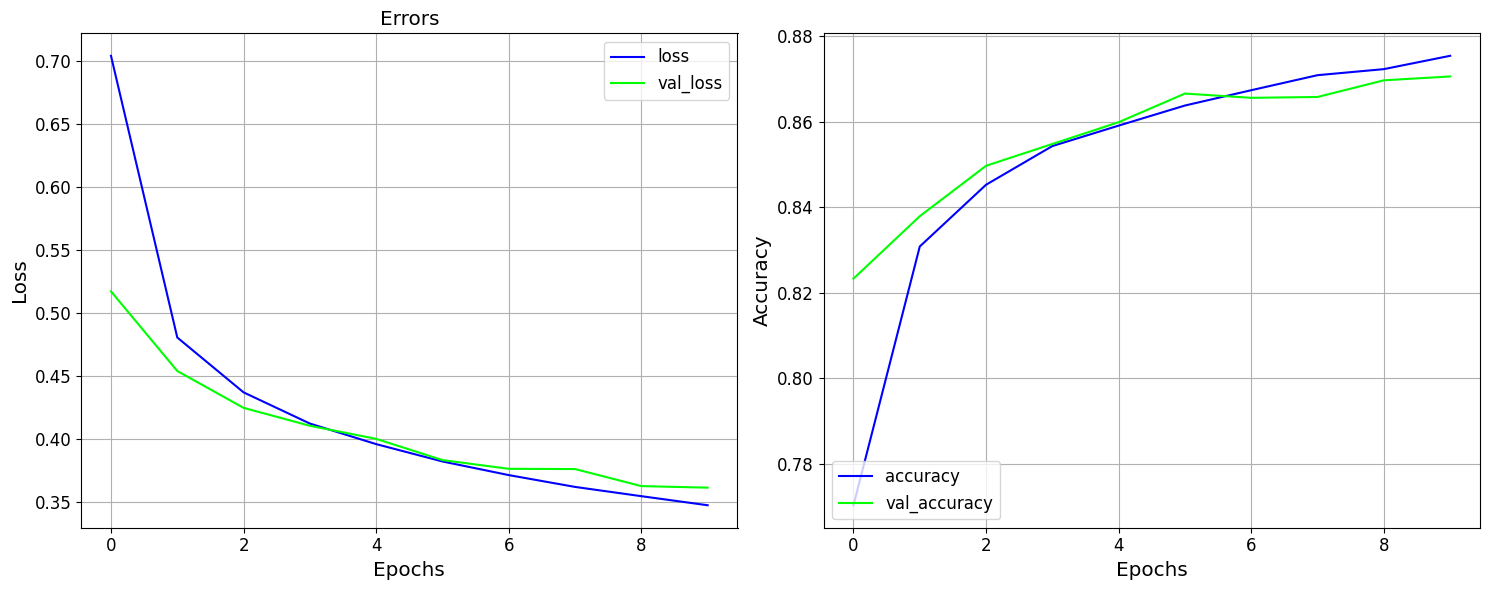

In [26]:
fig, axes = plt.subplots(1,2 , figsize = (15,6))

ax = axes[0]

hist_df.plot(y = ['loss', 'val_loss'], ax = ax, colormap=CMAP)

ax.set_xlabel("Epochs")
ax.set_ylabel('Loss')
ax.set_title('Errors')
ax.grid();
ax = axes[1]

hist_df.plot( y = ['accuracy', 'val_accuracy'], ax = ax, colormap=CMAP)

ax.set_xlabel("Epochs")
ax.set_ylabel('Accuracy')
ax.grid()
ax.legend(loc = 'lower left')

plt.tight_layout()

## Predictions
Build a prediction model using `tf.keras.Sequential` again and add `tf.keras.layers.Softmax` to model.

Make predictions and print classification reports and confusion matrix.

In [27]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [28]:
y_pred = prob_model(X_train)

In [29]:
print(classification_report(y_train, np.argmax(y_pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      6000
           1       0.99      0.96      0.98      6000
           2       0.83      0.77      0.80      6000
           3       0.83      0.92      0.87      6000
           4       0.77      0.85      0.81      6000
           5       0.97      0.94      0.95      6000
           6       0.73      0.67      0.70      6000
           7       0.91      0.95      0.93      6000
           8       0.96      0.97      0.97      6000
           9       0.96      0.95      0.96      6000

    accuracy                           0.88     60000
   macro avg       0.88      0.88      0.88     60000
weighted avg       0.88      0.88      0.88     60000



In [30]:
y_pred = prob_model(X_test).numpy()

print('Accuracy score on Test Data :{:.5f}'.format(accuracy_score(y_test, 
                                                                  np.argmax(y_pred, axis = 1))))

Accuracy score on Test Data :0.87060


In [31]:
print(classification_report(y_test, 
                            np.argmax(y_pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.75      0.78      1000
           3       0.84      0.92      0.88      1000
           4       0.78      0.87      0.82      1000
           5       0.95      0.91      0.93      1000
           6       0.69      0.66      0.68      1000
           7       0.90      0.94      0.92      1000
           8       0.95      0.96      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (2).

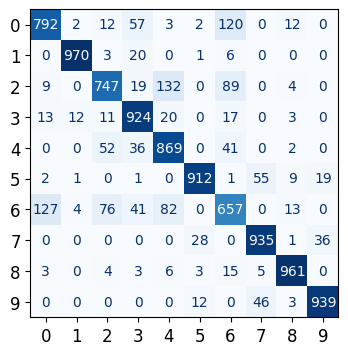

In [32]:
cm  = confusion_matrix(y_test, np.argmax(y_pred, axis = 1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)

plt.show();

In [33]:
hist_df[hist_df['val_loss'] == hist_df['val_loss'].min()]

,loss,accuracy,val_loss,val_accuracy
9,0.347738,0.875433,0.361685,0.8706
